In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [51]:
from helpers import load_data

# load dataset
x, y = load_data()

In [52]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)
build=build_k_indices(y, 10, 1)


In [92]:
test = build[2]
train = np.concatenate([build[0:2],build[3:]])
print(train)
#print(x.shape, y.shape)
x_train = x[train[0]]
for row in train[1:]:
    x_train = np.concatenate([x_train, x[row]])
        #x_train = np.concatenate(x_train, x[row], axis=None)
#print(x_train)        

[[27 35 40 38  2]
 [ 3 48 29 46 31]
 [42 49 26 22 13]
 [41 17 45 24 23]
 [ 4 33 14 30 10]
 [28 44 34 18 20]
 [25  6  7 47  1]
 [16  0 15  5 11]
 [ 9  8 12 43 37]]


In [88]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    test = k_indices[k]
    train = np.concatenate([k_indices[0:k], k_indices[k+1:]])
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    
    x_train = x[train[0]]
    y_train = y[train[0]]
    for row in train[1:]:
        x_train = np.concatenate([x_train, x[row]])
        y_train = np.concatenate([y_train, y[row]])
        
    x_test = x[test]
    y_test = y[test]
    
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    
    loss_tr, weights = ridge_regression(y_train, x_train, lambda_)
    
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    
    e_test = y_test - x_test @ weights
    loss_te = 1/(2*len(y_test)) * e_test.transpose() @ e_test 
    
    # ***************************************************
    #raise NotImplementedError
    return loss_tr, loss_te

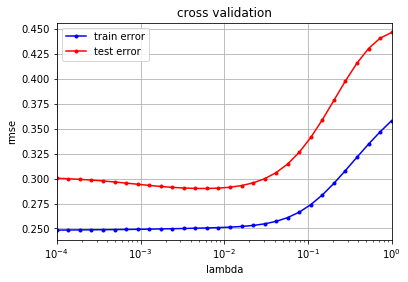

In [90]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    for lambda_ in lambdas:
        mean_tr = 0
        mean_te = 0
        for k in range (k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            mean_tr += loss_tr
            mean_te += loss_te
        rmse_tr.append(np.sqrt(2*mean_tr/4))    
        rmse_te.append(np.sqrt(2*mean_te/4))
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,) (50,)
(9950,

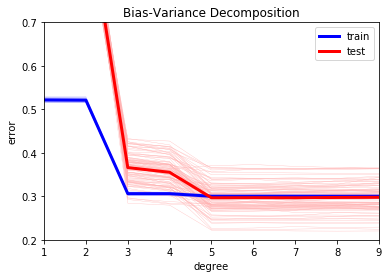

In [105]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        
        x_train, y_train, x_test, y_test = split_data(x, y, 1-ratio_train, seed)
        
        print(x_train.shape, x_test.shape)
        
        # ***************************************************
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        
        for ind, degree in enumerate(degrees):
            
            x_tr = build_poly(x_train, degree)
            x_te = build_poly(x_test, degree)
            
            mse, weight = least_squares(y_train, x_tr)
            
            e_test = y_test - x_te @ weight
            loss_te = 1/(2*len(y_test)) * e_test.transpose() @ e_test 
            
            rmse_tr[index_seed][ind] = np.sqrt(2*mse)
            rmse_te[index_seed][ind] = np.sqrt(2*loss_te)
        # ***************************************************
        #raise NotImplementedError
    #print(rmse_te)
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()